In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../src/')

In [15]:
import numpy as np
from modelling import ols,ridge
from modelling.sgd import SGD_optimizer
from data.create_dataset import *
from visualization.visualize import *
from sklearn.model_selection import  train_test_split

SGD_optimizer has been made as a class to provide flexibility. Now functions within the object can be defined based on given input parameters. For instance, if l2 is set as penalty, then the cost function is defined as such. I also think this class may be expanded to nn later on.

In [ ]:
beta = np.random.randn(2,1)
n = 1000
x = 2*np.random.rand(n,1)
y = 4+3*x+np.random.randn(n,1)

X = np.c_[np.ones((n,1)), x]

In [ ]:
beta_ordinary = ols.fit_beta(X,y)
beta_ordinary

In [ ]:
beta = ols.fit_beta_sgd(X,y,100,100)
beta

Awesome to see that the class works on first try almost. Or I hope at least. Question is, if there should have been a Ridge and OLS class as well, but I'd end up rewriting sklearn. I guess main point is to show how it's done, not to make the best code. However, wouldn't hurt with some code practise.

In [ ]:
sgd = SGD_optimizer(batch_size = 100, n_epochs = 100,gamma = 0.5)
beta_class = sgd.fit(X,y)
beta_class

In [ ]:
sgd = SGD_optimizer(batch_size = 100, n_epochs = 100,gamma = 0.5)
sgd.set_decay_constants(2,20)
beta_class = sgd.fit(X,y)
beta_class

Will now test on the 2D terrain data. Shouldn't be any problems as all the pre-processing ensures the data is on the same format as previous test data.

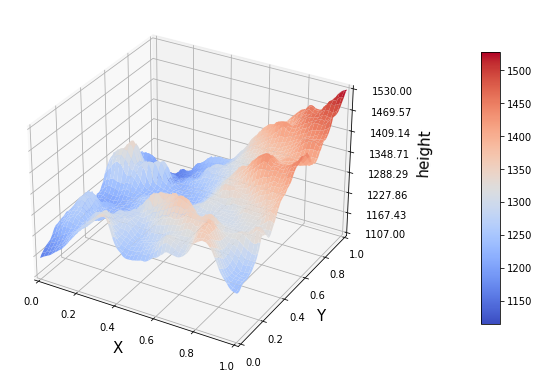

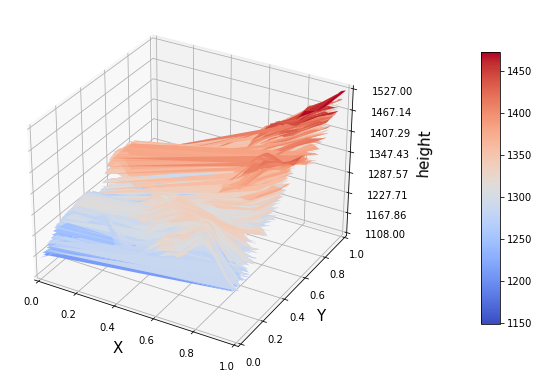

In [3]:
X, z = create_dataset('../data/raw/SRTM_data_Norway_1.tif',degree=4)
X_train, X_test, z_train, z_test = train_test_split(X,z, test_size=0.2)
surf1 = plot_surf_from_X(X,z)
surf2 = plot_surf_from_X(X_train,z_train)

In [4]:
print(type(z_train))

<class 'numpy.ndarray'>


In [45]:
sgd = SGD_optimizer(batch_size = 100, n_epochs = 1000,use_momentum= False, gamma = 0.5,regularization = 'l2', lmb = 1, lr=0.001)
beta_class = sgd.fit(X_train,z_train)
beta_class

array([[1275.04717022],
       [  11.44179757],
       [   0.7480084 ],
       [  11.67098368],
       [   8.12745359],
       [   0.5604611 ],
       [  10.50107856],
       [   8.40719854],
       [   6.31978509],
       [   0.35490734],
       [   9.24400061],
       [   7.6861515 ],
       [   6.53853528],
       [   5.1867455 ],
       [   0.17950737]])

In [44]:
np.set_printoptions(suppress=True)
print(beta_class)

[[1275.19433536]
 [  11.32446522]
 [   0.73989888]
 [  11.53291646]
 [   8.05741874]
 [   0.6170939 ]
 [  10.3605584 ]
 [   8.32672453]
 [   6.29951912]
 [   0.45719731]
 [   9.10754476]
 [   7.60663973]
 [   6.50414826]
 [   5.20190397]
 [   0.31281992]]


So the preprocessing actually returns an imageio type, which autograd can't handle. Must change this.

In [7]:
beta_ols = ols.fit_beta(X_train,z_train)
beta_ols

array([[ 1162.93771137],
       [  702.74030689],
       [  414.09320281],
       [-1433.74831488],
       [-2180.28030562],
       [ -814.23113335],
       [ 1661.59398193],
       [ 3199.93765559],
       [  841.38069727],
       [ 1150.32151827],
       [ -889.96874751],
       [ -679.83258996],
       [-1572.39518855],
       [  709.47624647],
       [ -789.22279783]])

In [118]:
beta = ols.fit_beta_sgd(X_train,z_train, batch_size = z_train.shape[0], n_epochs = 1000000)
beta

array([[1232.47540876],
       [ 106.01923093],
       [  23.93411316],
       [  15.68756883],
       [ -37.78330121],
       [ -57.76750261],
       [ -16.83168253],
       [  63.38746445],
       [  26.54371827],
       [ -38.5363138 ],
       [ -45.77522877],
       [  97.73372519],
       [ 111.40273831],
       [  74.77575497],
       [ -17.711548  ]])

In [96]:
from sklearn.linear_model import LinearRegression,Ridge
linreg = LinearRegression(fit_intercept=True).fit(X_train,z_train)
print(linreg.coef_.T)
print(linreg.intercept_)

[[    0.        ]
 [  702.74030689]
 [  414.09320281]
 [-1433.74831489]
 [-2180.28030562]
 [ -814.23113336]
 [ 1661.59398195]
 [ 3199.93765559]
 [  841.38069727]
 [ 1150.32151828]
 [ -889.96874752]
 [ -679.83258996]
 [-1572.39518855]
 [  709.47624647]
 [ -789.22279783]]
[1162.93771137]


In [25]:
rig = Ridge(alpha=1,fit_intercept=True).fit(X_train[:,1:],z_train)
print(rig.intercept_.T)
print(rig.coef_.T)

[1242.03703718]
[[  24.89759881]
 [  14.74479911]
 [ 201.14937253]
 [-236.43924419]
 [  -1.91167419]
 [  56.39270287]
 [ 246.64635557]
 [ -39.17710928]
 [  12.94709865]
 [-261.58025969]
 [ 172.68232595]
 [  -5.01696321]
 [ 218.39762055]
 [-103.36712874]]


In [27]:
rig1 = Ridge(alpha=1,fit_intercept=True).fit(X_train,z_train)
print(rig1.intercept_)
print(rig1.coef_.T)

[1242.03703718]
[[   0.        ]
 [  24.89759881]
 [  14.74479911]
 [ 201.14937253]
 [-236.43924419]
 [  -1.91167419]
 [  56.39270287]
 [ 246.64635557]
 [ -39.17710928]
 [  12.94709865]
 [-261.58025969]
 [ 172.68232595]
 [  -5.01696321]
 [ 218.39762055]
 [-103.36712874]]


In [40]:
rig2 = ridge.fit_beta(X_train, z_train, 1,fit_intercept = True)
rig2

array([[1242.03703718],
       [  24.89759881],
       [  14.74479911],
       [ 201.14937253],
       [-236.43924419],
       [  -1.91167419],
       [  56.39270287],
       [ 246.64635557],
       [ -39.17710928],
       [  12.94709865],
       [-261.58025969],
       [ 172.68232595],
       [  -5.01696321],
       [ 218.39762055],
       [-103.36712874]])

So sklearn does converge to correct at last it seems.

In [110]:
from sklearn.linear_model import SGDRegressor
sgdreg = SGDRegressor(random_state=42, fit_intercept = False, max_iter = 100000, penalty=None,alpha=1,learning_rate = 'constant', eta0 = 0.0001,tol=None)
sgdreg = sgdreg.fit(X_train,z_train.ravel())
print(sgdreg.coef_.T)
print(sgdreg.intercept_.T)

[1223.97821556  159.9629013    82.1440184   -25.70460898 -852.11772321
  -58.72734729  271.63971369 1217.49135119  -75.84567434  278.82891769
 -418.431374    158.69549025 -888.3872795   854.05008274 -397.34830197]
[0.]


In [106]:
sgdreg2 = SGDRegressor( random_state=42, fit_intercept = True, max_iter = 100000, penalty=None,alpha=1,learning_rate = 'constant', eta0 = 0.001,tol=None)
sgdreg2 = sgdreg2.fit(X_train,z_train.ravel())
print(sgdreg2.coef_.T)
print(sgdreg2.intercept_.T)

[  584.10300607   650.63523841   376.57567067 -1271.41804452
 -2082.595441    -708.73124791  1459.6255573   3080.68148657
   741.8187758   1026.92547534  -804.04825471  -628.60582857
 -1532.29533619   748.14866651  -738.09660293]
[584.10300607]


In [109]:
sgdreg2 = SGDRegressor( random_state=42, fit_intercept = True, max_iter = 100000, penalty=None,alpha=1,learning_rate = 'constant', eta0 = 0.001,tol=None)
sgdreg2 = sgdreg2.fit(X_train[:,1:],z_train.ravel())
print(sgdreg2.coef_.T)
print(sgdreg2.intercept_.T)

[  650.66492761   376.59743368 -1271.68865037 -2082.81471196
  -708.99186996  1459.86218468  3080.85477149   741.99873535
  1027.1423777   -804.19366887  -628.69844795 -1532.3901664
   748.03890224  -738.22345843]
[1168.37545171]


In [111]:
sgdreg2 = SGDRegressor( random_state=42, fit_intercept = False, max_iter = 100000, penalty=None,alpha=1,learning_rate = 'constant', eta0 = 0.001,tol=None)
sgdreg2 = sgdreg2.fit(X_train[:,1:],z_train.ravel())
print(sgdreg2.coef_.T)
print(sgdreg2.intercept_.T)

[  7392.46024351   6975.00830677 -15853.21872409 -19793.24291251
 -14804.36730201  15088.49271059  21184.48227163  18547.401494
  14106.43607427  -5438.41951649  -7113.73834124  -8467.87621339
  -5553.97747726  -5167.29192313]
[0.]


In [103]:
sgdreg = SGDRegressor( random_state=42, fit_intercept = False, max_iter = 100000, penalty=None,alpha=1,learning_rate = 'constant', eta0 = 0.001,tol=None)
sgdreg = sgdreg.fit(X_train,z_train.ravel())
print(np.column_stack((sgdreg.coef_.T,linreg.coef_.T,sgdreg2)))
print(sgdreg.intercept_.T,linreg.intercept_)

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 15 and the array at index 2 has size 1

In [54]:
min(mat)

0.04205292469827755

In [74]:
int(1/2)

0

It's wierd that I'm not getting the same results as with the analytical solution. Squared loss should be convex and thereby give the same result if learning rate is low enough and enough iterations are used. Basically if optimization converges. But it doesn't seem like the case here.
A thing to test is if constant random state with and without fit intercept gives same intercept.